In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

%matplotlib inline

import scipy.stats as stats 
import random

# **One-way Anova Test**

*Suppose a certain e-commerce company wants to understand whether sales from different advertisements are different. The company has reasons to believe that advertisement types may be the factor responsible for differences in sales.*
 
*For this purpose, the company decided to run a statistical experiment using different types of advertisements to target the customers, then they randomly selected a sample of the advertisements sales and they would like to test if the sales depends on advertisement types at a 5% significance level.*

Let $\mu_1, \mu_2, \mu_3$ be the means of sales for advertisment types display, paid search, and social media respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one advertisment sales is different from the rest.


In [2]:
ads = pd.read_csv('ads_samp.csv')
ads.drop(columns = ['Unnamed: 0'], inplace=True)
ads

,product_ids,ads,sales
0,9301,social media,9319.74
1,5358,paid search,11552.47
2,8293,social media,8493.19
3,4972,paid search,16530.58
4,7024,display,11739.54
...,...,...,...
405,6356,paid search,13436.16
406,8784,paid search,11715.92
407,6528,paid search,11936.56
408,8523,social media,12508.15


Here, **sales** is the response and **ads** is the factor.

In [3]:
ads['ads'].value_counts()

social media    140
paid search     140
display         130
Name: ads, dtype: int64

ads
display         12312.08
paid search     11908.98
social media    11690.03
Name: sales, dtype: float64


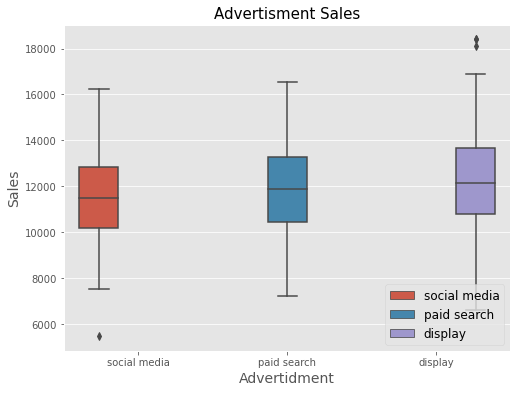

In [5]:
print(round(ads.groupby('ads')['sales'].mean(),2))

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (8,6))
a = sns.boxplot(x = 'ads', y = 'sales' , data = ads, hue = 'ads')
a.set_title('Advertisment Sales', fontsize = 15)
a.set_xlabel('Advertidment', fontsize=14)
a.set_ylabel('Sales', fontsize=14)
plt.legend(loc='lower right',fontsize=12)
plt.show()

<Figure size 864x576 with 0 Axes>

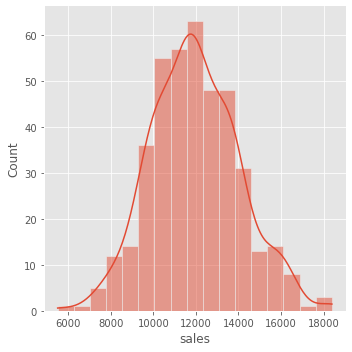

In [7]:
plt.figure(figsize = (12,8))
sns.displot(ads['sales'], kde=True)

**Insight**
- The advertisements sales are approximately normal distributed.

Now, the normality and equality variance assumptions need to be checked. 

- For testing normality, Shapiro-Wilk's test is applied to the response variable.

- For equality of variances, Levene's test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Advertisments sales follows a normal distribution

against the alternative hypothesis

>$H_a:$ Advertisments sales not follow a normal distribution

In [8]:
from scipy import stats

w, p_value = stats.shapiro(ads['sales']) 
print('The p-value is', p_value)

The p-value is 0.1454678177833557


Since the p-value of the test is greater than the level of significance, we fail to reject the null hypothesis that the response variable follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [9]:
from scipy.stats import levene

statistic, p_value = levene(ads['sales'][ads['ads'] == 'display'], 
                            ads['sales'][ads['ads'] == 'paid search'], 
                            ads['sales'][ads['ads'] ==  'social media'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.4985826674279157


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Are the assumptions of Anova are satisfied or not

- The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
- Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
- Population variances are equal - Yes, the homogeneity of variance assumption is verified using Levene's test.

### Let's find the p-value

In [10]:
from scipy.stats import f_oneway


test_stat, p_value = f_oneway(ads.loc[ads['ads'] == 'display', 'sales'],
                              ads.loc[ads['ads'] == 'paid search', 'sales'],
                              ads.loc[ads['ads'] == 'social media', 'sales'])
print('The p-value is ' + str(p_value))

The p-value is 0.04432510904231562


As the p-value is less than the significance level (0.05), we can reject the null hypothesis. Hence, we do have enough statistical evidence to conclude that at least one advertisement's sales is different from the rest at a 5% significance level.

### **Conclusion**

- With 95% confidence we conclude that we have enough statistical evidence to say that at least one advertisement sales is different from the others.
- However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests are used to test the differences between all pairs of means

### Multiple Comparison test (Tukey HSD)

To identify which advertisement sales mean is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog = ads['sales'], groups = ads['ads'], alpha = 0.05)
print(m_comp)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1      group2     meandiff p-adj    lower     upper   reject
--------------------------------------------------------------------
    display  paid search -403.1032 0.2446  -993.6724 187.4661  False
    display social media -622.0485 0.0362 -1212.6177 -31.4792   True
paid search social media -218.9453 0.6356  -798.4749 360.5843  False
--------------------------------------------------------------------


### **Conclusion**

- As the p-value for comparing the mean sales for the pair of display ads - social media ads is less than the significance level, the null hypothesis of equality of all population means can be rejected.

- Thus, we can say that the mean sales for paid search ads - display ads and social media ads is similar but the sales for advertisement of social media ads is significantly different from display ads.